<a href="https://colab.research.google.com/github/Achittaphon/ai/blob/main/Flower_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

link: https://colab.research.google.com/drive/1F4m7lef-a9yzYuIeBAzDYdRT_VAFWuEP?usp=sharing

6410210351 อชิตพล เหมจันทร์

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/flower_classification'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

เอาต์พุตของการสตรีมมีการตัดเหลือเพียง 5000 บรรทัดสุดท้าย
/content/drive/MyDrive/flower_classification/train/dandelion/15308453885_0e1dd55146_c.jpg
/content/drive/MyDrive/flower_classification/train/dandelion/14338906583_0db1b708d5_c.jpg
/content/drive/MyDrive/flower_classification/train/dandelion/14672062000_3be80bd9b5_c.jpg
/content/drive/MyDrive/flower_classification/train/dandelion/14640917959_d18494a95e_c.jpg
/content/drive/MyDrive/flower_classification/train/dandelion/12141802883_882340085c_c.jpg
/content/drive/MyDrive/flower_classification/train/dandelion/14999274786_fb8f6da828_c.jpg
/content/drive/MyDrive/flower_classification/train/dandelion/10351094106_f6409cb0c0_c.jpg
/content/drive/MyDrive/flower_classification/train/dandelion/14458301723_2cb98c9ac9_c.jpg
/content/drive/MyDrive/flower_classification/train/dandelion/14076300250_948380aaac_c.jpg
/content/drive/MyDrive/flower_classification/train/dandelion/14527198546_d3399a2a93_c.jpg
/content/drive/MyDrive/flower_classificatio

# **โหลด ไลบรารี่ ที่จำเป็น**

In [3]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from tqdm import tqdm
from keras.callbacks import EarlyStopping,ModelCheckpoint
from sklearn.metrics import confusion_matrix , accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import glob
import pandas as pan
import matplotlib.pyplot as plotter
import warnings
warnings.filterwarnings('ignore')

# **สร้างตัวแปรและเรียกใช้ข้อมูล**

In [4]:
df_train='/content/drive/MyDrive/flower_classification/train'
pd.DataFrame(os.listdir(df_train),columns=['Files_Name'])

,Files_Name
0,carnation
1,astilbe
2,bellflower
3,common_daisy
4,black_eyed_susan
5,california_poppy
6,calendula
7,coreopsis
8,iris
9,dandelion


In [5]:
df_test='/content/drive/MyDrive/flower_classification/val'
pd.DataFrame(os.listdir(df_test),columns=['Files_Name'])

,Files_Name
0,astilbe
1,bellflower
2,black_eyed_susan
3,calendula
4,california_poppy
5,carnation
6,coreopsis
7,common_daisy
8,iris
9,tulip


# **จัดการข้อมูล**

In [6]:
files = [i for i in glob.glob(df_train + "//*//*")]
np.random.shuffle(files)
labels = [os.path.dirname(i).split("/")[-1] for i in files]
data = zip(files, labels)
dataframe = pan.DataFrame(data, columns = ["Image", "Label"])
dataframe

,Image,Label
0,/content/drive/MyDrive/flower_classification/t...,calendula
1,/content/drive/MyDrive/flower_classification/t...,carnation
2,/content/drive/MyDrive/flower_classification/t...,dandelion
3,/content/drive/MyDrive/flower_classification/t...,carnation
4,/content/drive/MyDrive/flower_classification/t...,sunflower
...,...,...
13637,/content/drive/MyDrive/flower_classification/t...,dandelion
13638,/content/drive/MyDrive/flower_classification/t...,coreopsis
13639,/content/drive/MyDrive/flower_classification/t...,black_eyed_susan
13640,/content/drive/MyDrive/flower_classification/t...,coreopsis


<Axes: xlabel='Label', ylabel='count'>

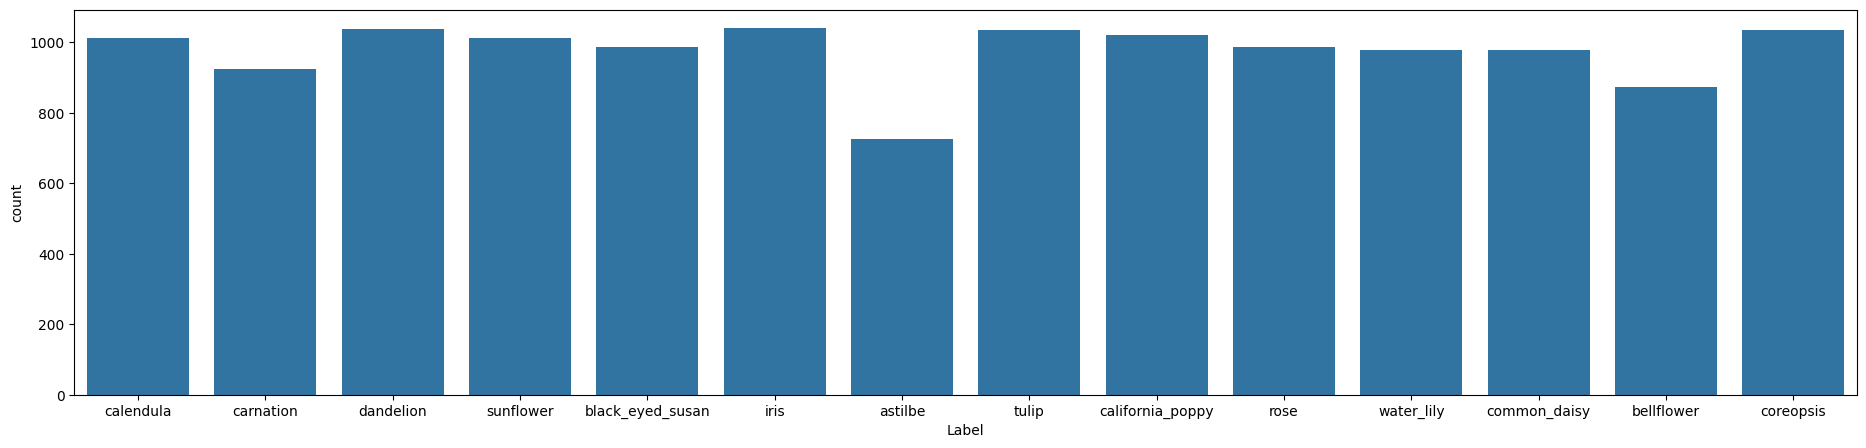

In [7]:
plt.figure(figsize=(23,5))
sns.countplot(x= dataframe["Label"])

In [8]:
train_data_dir ='/content/drive/MyDrive/flower_classification/train'
batch_size = 32
target_size = (224,224)
validation_split = 0.2
train= tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    validation_split=validation_split,
    subset="training",
    seed=100,
    image_size=target_size,
    batch_size=batch_size,
)
validation= tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    validation_split=validation_split,
    subset="validation",
    seed=200,
    image_size=target_size,
    batch_size=batch_size,
)

Found 13642 files belonging to 14 classes.
Using 10914 files for training.
Found 13642 files belonging to 14 classes.
Using 2728 files for validation.


In [9]:
cl_nm = train.class_names
cl_nm

['astilbe',
 'bellflower',
 'black_eyed_susan',
 'calendula',
 'california_poppy',
 'carnation',
 'common_daisy',
 'coreopsis',
 'dandelion',
 'iris',
 'rose',
 'sunflower',
 'tulip',
 'water_lily']

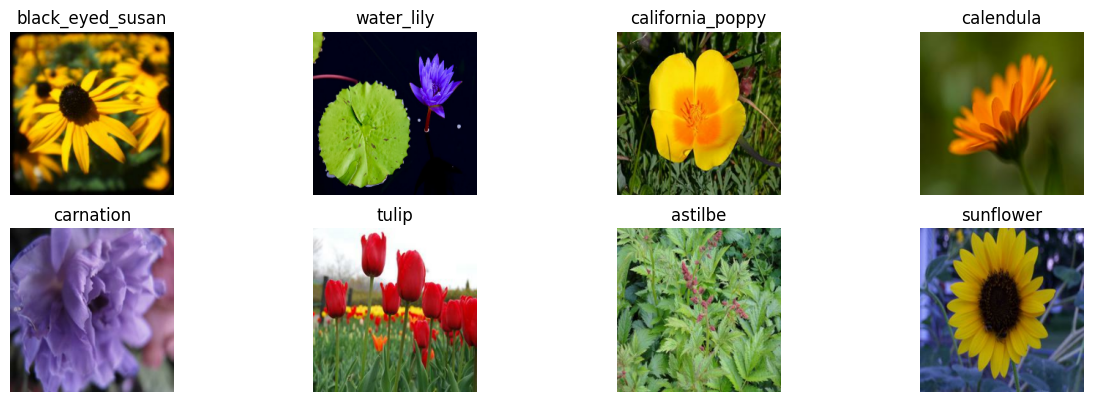

In [10]:
plt.figure(figsize=(15, 20))
for images, labels in train.take(1):
    for i in range(8):
        ax = plt.subplot(8, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(cl_nm[labels[i]])
        plt.axis("off")

In [26]:
base_model = tf.keras.applications.MobileNetV3Small(input_shape=(224,224,3),include_top=False,weights='imagenet')
# base_model.trainable = False
keras_model=keras.models.Sequential()
keras_model.add(base_model)
keras_model.add(keras.layers.Flatten())
keras_model.add(keras.layers.Dropout(0.5))
keras_model.add(keras.layers.Dense(14,activation=tf.nn.softmax))
keras_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 MobilenetV3small (Function  (None, 7, 7, 576)         939120    
 al)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 28224)             0         
                                                                 
 dropout_2 (Dropout)         (None, 28224)             0         
                                                                 
 dense_2 (Dense)             (None, 14)                395150    
                                                                 
Total params: 1334270 (5.09 MB)
Trainable params: 1322158 (5.04 MB)
Non-trainable params: 12112 (47.31 KB)
_________________________________________________________________


In [27]:
checkpoint =ModelCheckpoint("my_keras_model.h5", save_best_only=True)

In [28]:
early_stopping =EarlyStopping(patience=5, restore_best_weights=True)

In [29]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from keras.callbacks import EarlyStopping, ModelCheckpoint
import glob
import pandas as pd
import matplotlib.pyplot as plt
import warnings

In [30]:
checkpoint = ModelCheckpoint("my_keras_model.h5", save_best_only=True)
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)

test_data_dir = '/content/drive/MyDrive/flower_classification/val'
test = tf.keras.preprocessing.image_dataset_from_directory(
    test_data_dir,
    image_size=(224, 224),
)


Found 98 files belonging to 14 classes.


In [31]:
keras_model.compile(optimizer ='Adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist=keras_model.fit_generator(train,epochs=10,validation_data=validation,callbacks=[checkpoint,early_stopping])

Epoch 1/10
342/342 [==============================] - 480s 1s/step - loss: 0.9058 - accuracy: 0.7664 - val_loss: 2.5044 - val_accuracy: 0.6547
Epoch 2/10
342/342 [==============================] - 53s 152ms/step - loss: 0.3186 - accuracy: 0.9079 - val_loss: 1.4810 - val_accuracy: 0.7416
Epoch 3/10
342/342 [==============================] - 54s 154ms/step - loss: 0.3306 - accuracy: 0.9075 - val_loss: 1.2805 - val_accuracy: 0.7427
Epoch 4/10
342/342 [==============================] - 53s 153ms/step - loss: 0.2959 - accuracy: 0.9228 - val_loss: 2.0223 - val_accuracy: 0.6873
Epoch 5/10
342/342 [==============================] - 54s 154ms/step - loss: 0.2160 - accuracy: 0.9392 - val_loss: 1.0646 - val_accuracy: 0.8182
Epoch 6/10
342/342 [==============================] - 54s 155ms/step - loss: 0.2386 - accuracy: 0.9431 - val_loss: 0.7741 - val_accuracy: 0.8695
Epoch 7/10
342/342 [==============================] - 54s 155ms/step - loss: 0.1423 - accuracy: 0.9615 - val_loss: 0.3142 - val_accu

In [32]:
score, acc = keras_model.evaluate(validation)
print('Test Loss =', score)
print('Test Accuracy =', acc)

86/86 [==============================] - 10s 95ms/step - loss: 0.4676 - accuracy: 0.9153
Test Loss = 0.46759963035583496
Test Accuracy = 0.9153226017951965


In [34]:
hist_=pd.DataFrame(hist.history)
hist_

,loss,accuracy,val_loss,val_accuracy
0,0.905773,0.766355,2.504398,0.654692
1,0.318572,0.907916,1.480958,0.741569
2,0.330571,0.907550,1.280538,0.742669
3,0.295884,0.922760,2.022272,0.687317
4,0.215956,0.939161,1.064567,0.818182
5,0.238633,0.943101,0.774123,0.869501
6,0.142265,0.961517,0.314246,0.941716
7,0.249266,0.941635,0.768796,0.880865
8,0.248558,0.944108,0.385402,0.932918
9,0.127367,0.967198,0.467600,0.915323


In [35]:
hist_=pd.DataFrame(hist.history)
hist_

,loss,accuracy,val_loss,val_accuracy
0,0.905773,0.766355,2.504398,0.654692
1,0.318572,0.907916,1.480958,0.741569
2,0.330571,0.907550,1.280538,0.742669
3,0.295884,0.922760,2.022272,0.687317
4,0.215956,0.939161,1.064567,0.818182
5,0.238633,0.943101,0.774123,0.869501
6,0.142265,0.961517,0.314246,0.941716
7,0.249266,0.941635,0.768796,0.880865
8,0.248558,0.944108,0.385402,0.932918
9,0.127367,0.967198,0.467600,0.915323


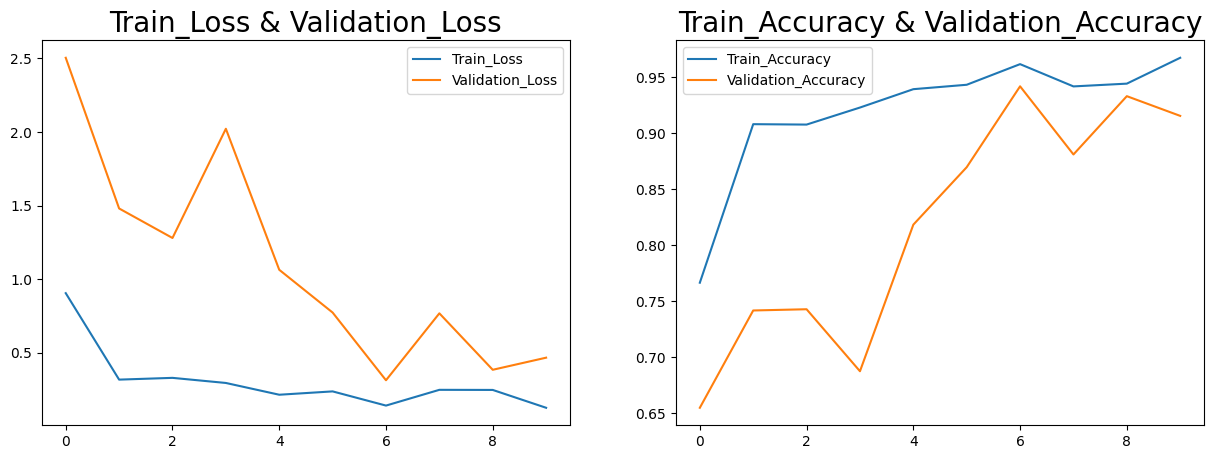

In [36]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(hist_['loss'],label='Train_Loss')
plt.plot(hist_['val_loss'],label='Validation_Loss')
plt.title('Train_Loss & Validation_Loss',fontsize=20)
plt.legend()
plt.subplot(1,2,2)
plt.plot(hist_['accuracy'],label='Train_Accuracy')
plt.plot(hist_['val_accuracy'],label='Validation_Accuracy')
plt.title('Train_Accuracy & Validation_Accuracy',fontsize=20)
plt.legend()

##Test Data

In [38]:
test= tf.keras.preprocessing.image_dataset_from_directory(
    df_test,
    image_size=(224,224),
    validation_split=None,
)

Found 98 files belonging to 14 classes.


In [39]:
test_score, test_acc = keras_model.evaluate(test)
print('Test Loss =', test_score)
print('Test Accuracy =', test_acc)

4/4 [==============================] - 11s 25ms/step - loss: 0.4381 - accuracy: 0.9082
Test Loss = 0.4381489157676697
Test Accuracy = 0.9081632494926453


In [40]:
Accuracy = [('valid', score, acc),
          ('test', test_score, test_acc)
         ]

predict_test = pd.DataFrame(data = Accuracy, columns=['Model', 'loss', 'accuracy'])
predict_test





,Model,loss,accuracy
0,valid,0.467600,0.915323
1,test,0.438149,0.908163
